# Analysis 2
#### This Python script embarks on an illuminating course exercise, peeling back the layers of London's population changes between 1961 and 2015.

---

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For unit testing answers.
from unittest.mock import patch

In [3]:
df = pd.read_excel('ons-mye-population-totals.xls', sheet_name='MYE')
pd.set_option('display.max_rows', 10)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,PERSONS ALL AGES,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Code,New Code,Area name,Inner or Outer London,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,Area (hectares),LAND AREA (Sq Km)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00AA,E09000001,City of London,Inner,5000.0,5000.0,4000.0,4000.0,4000.0,4000.0,...,7400.0,7500.0,7300.0,7400.0,7600.0,7600.0,8100.0,8760.0,290.393,2.89798
3,00AB,E09000002,Barking and Dagenham,Outer,176000.0,176000.0,174000.0,173000.0,170000.0,168000.0,...,172500.0,177600.0,182800.0,187000.0,190600.0,194400.0,198300.0,201979.0,3610.78,36.0898
4,00AC,E09000003,Barnet,Outer,318000.0,318000.0,316000.0,315000.0,314000.0,315000.0,...,339200.0,345800.0,351400.0,357500.0,364000.0,369100.0,374900.0,379691.0,8674.83,86.7373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,922,N92000002,Northern Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1779200.0,1793300.0,1804800.0,1814300.0,1823600.0,1829700.0,1840500.0,1851621.0,1.41503e+06,13576
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,941,K04000001,England and Wales,NaN,46196200.0,46657300.0,46973100.0,47324300.0,47671400.0,47966500.0,...,54841700.0,55235300.0,55692400.0,56170900.0,56567800.0,56948200.0,57408700.0,57885413.0,15101226,151012
55,925,K03000001,Great Britain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60044600.0,60467200.0,60954600.0,61470800.0,61881400.0,62275900.0,62756300.0,63258413.0,2.28944e+07,228919


In [4]:
df = pd.read_excel('ons-mye-population-totals.xls', sheet_name='MYE', usecols='C:BG')
df

,Unnamed: 2,Unnamed: 3,PERSONS ALL AGES,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,Area name,Inner or Outer London,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,City of London,Inner,5000.0,5000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,7300.0,7600.0,7400.0,7500.0,7300.0,7400.0,7600.0,7600.0,8100.0,8760.0
3,Barking and Dagenham,Outer,176000.0,176000.0,174000.0,173000.0,170000.0,168000.0,167000.0,165000.0,...,167200.0,169000.0,172500.0,177600.0,182800.0,187000.0,190600.0,194400.0,198300.0,201979.0
4,Barnet,Outer,318000.0,318000.0,316000.0,315000.0,314000.0,315000.0,313000.0,310000.0,...,330800.0,334800.0,339200.0,345800.0,351400.0,357500.0,364000.0,369100.0,374900.0,379691.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,Northern Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1743100.0,1761700.0,1779200.0,1793300.0,1804800.0,1814300.0,1823600.0,1829700.0,1840500.0,1851621.0
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,England and Wales,NaN,46196200.0,46657300.0,46973100.0,47324300.0,47671400.0,47966500.0,48271900.0,48510700.0,...,53950900.0,54387400.0,54841700.0,55235300.0,55692400.0,56170900.0,56567800.0,56948200.0,57408700.0,57885413.0
55,Great Britain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59084000.0,59557400.0,60044600.0,60467200.0,60954600.0,61470800.0,61881400.0,62275900.0,62756300.0,63258413.0


In [5]:
df = pd.read_excel('ons-mye-population-totals.xls', sheet_name='MYE', usecols='C:BG', skiprows=[0,2])
df

,Area name,Inner or Outer London,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,Inner,5000.0,5000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,7300.0,7600.0,7400.0,7500.0,7300.0,7400.0,7600.0,7600.0,8100.0,8760.0
1,Barking and Dagenham,Outer,176000.0,176000.0,174000.0,173000.0,170000.0,168000.0,167000.0,165000.0,...,167200.0,169000.0,172500.0,177600.0,182800.0,187000.0,190600.0,194400.0,198300.0,201979.0
2,Barnet,Outer,318000.0,318000.0,316000.0,315000.0,314000.0,315000.0,313000.0,310000.0,...,330800.0,334800.0,339200.0,345800.0,351400.0,357500.0,364000.0,369100.0,374900.0,379691.0
3,Bexley,Outer,210000.0,211000.0,212000.0,214000.0,215000.0,215000.0,215000.0,215000.0,...,223300.0,224600.0,226700.0,228100.0,230700.0,232800.0,234300.0,236700.0,239900.0,242142.0
4,Brent,Outer,295000.0,294000.0,294000.0,292000.0,291000.0,290000.0,289000.0,285000.0,...,276500.0,283300.0,290900.0,298100.0,304800.0,312200.0,314700.0,317300.0,320800.0,324012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Northern Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1743100.0,1761700.0,1779200.0,1793300.0,1804800.0,1814300.0,1823600.0,1829700.0,1840500.0,1851621.0
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,England and Wales,NaN,46196200.0,46657300.0,46973100.0,47324300.0,47671400.0,47966500.0,48271900.0,48510700.0,...,53950900.0,54387400.0,54841700.0,55235300.0,55692400.0,56170900.0,56567800.0,56948200.0,57408700.0,57885413.0
53,Great Britain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59084000.0,59557400.0,60044600.0,60467200.0,60954600.0,61470800.0,61881400.0,62275900.0,62756300.0,63258413.0


In [6]:
df = pd.read_excel('ons-mye-population-totals.xls', sheet_name='MYE', usecols='C:BG', skiprows=[0,2], nrows=33)
df

,Area name,Inner or Outer London,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,Inner,5000,5000,4000,4000,4000,4000,4000,4000,...,7300,7600,7400.0,7500,7300,7400,7600,7600,8100,8760
1,Barking and Dagenham,Outer,176000,176000,174000,173000,170000,168000,167000,165000,...,167200,169000,172500.0,177600,182800,187000,190600,194400,198300,201979
2,Barnet,Outer,318000,318000,316000,315000,314000,315000,313000,310000,...,330800,334800,339200.0,345800,351400,357500,364000,369100,374900,379691
3,Bexley,Outer,210000,211000,212000,214000,215000,215000,215000,215000,...,223300,224600,226700.0,228100,230700,232800,234300,236700,239900,242142
4,Brent,Outer,295000,294000,294000,292000,291000,290000,289000,285000,...,276500,283300,290900.0,298100,304800,312200,314700,317300,320800,324012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Sutton,Outer,168000,168000,167000,167000,166000,166000,165000,166000,...,182900,184200,185900.0,188200,189300,191100,193600,195900,198100,200145
29,Tower Hamlets,Inner,204000,203000,201000,202000,200000,198000,192000,185000,...,218400,225300,231900.0,240500,248500,256000,263000,272900,284000,295236
30,Waltham Forest,Outer,247000,246000,244000,243000,241000,240000,238000,236000,...,230700,235700,242100.0,248100,254000,259700,262600,265800,268000,271170
31,Wandsworth,Inner,334000,333000,330000,328000,326000,324000,322000,317000,...,287500,291400,294300.0,299300,302600,307700,308300,310500,312100,314544


In [7]:
df.rename(columns={'Area name': 'borough', 'Inner or Outer London': 'location'}, inplace=True)
df

,borough,location,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,Inner,5000,5000,4000,4000,4000,4000,4000,4000,...,7300,7600,7400.0,7500,7300,7400,7600,7600,8100,8760
1,Barking and Dagenham,Outer,176000,176000,174000,173000,170000,168000,167000,165000,...,167200,169000,172500.0,177600,182800,187000,190600,194400,198300,201979
2,Barnet,Outer,318000,318000,316000,315000,314000,315000,313000,310000,...,330800,334800,339200.0,345800,351400,357500,364000,369100,374900,379691
3,Bexley,Outer,210000,211000,212000,214000,215000,215000,215000,215000,...,223300,224600,226700.0,228100,230700,232800,234300,236700,239900,242142
4,Brent,Outer,295000,294000,294000,292000,291000,290000,289000,285000,...,276500,283300,290900.0,298100,304800,312200,314700,317300,320800,324012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Sutton,Outer,168000,168000,167000,167000,166000,166000,165000,166000,...,182900,184200,185900.0,188200,189300,191100,193600,195900,198100,200145
29,Tower Hamlets,Inner,204000,203000,201000,202000,200000,198000,192000,185000,...,218400,225300,231900.0,240500,248500,256000,263000,272900,284000,295236
30,Waltham Forest,Outer,247000,246000,244000,243000,241000,240000,238000,236000,...,230700,235700,242100.0,248100,254000,259700,262600,265800,268000,271170
31,Wandsworth,Inner,334000,333000,330000,328000,326000,324000,322000,317000,...,287500,291400,294300.0,299300,302600,307700,308300,310500,312100,314544


In [8]:
df['borough'] = df['borough'].astype('category')
df['location'] = df['location'].str.lower().astype('category')
df[['borough', 'location']].dtypes

borough     category
location    category
dtype: object

In [9]:
ts = df.melt(id_vars=['borough', 'location'], var_name='year', value_name='population')
ts

,borough,location,year,population
0,City of London,inner,1961,5000.0
1,Barking and Dagenham,outer,1961,176000.0
2,Barnet,outer,1961,318000.0
3,Bexley,outer,1961,210000.0
4,Brent,outer,1961,295000.0
...,...,...,...,...
1810,Sutton,outer,2015,200145.0
1811,Tower Hamlets,inner,2015,295236.0
1812,Waltham Forest,outer,2015,271170.0
1813,Wandsworth,inner,2015,314544.0


In [10]:
ts['year'] = pd.to_datetime(ts['year'], format='%Y')
ts

,borough,location,year,population
0,City of London,inner,1961-01-01,5000.0
1,Barking and Dagenham,outer,1961-01-01,176000.0
2,Barnet,outer,1961-01-01,318000.0
3,Bexley,outer,1961-01-01,210000.0
4,Brent,outer,1961-01-01,295000.0
...,...,...,...,...
1810,Sutton,outer,2015-01-01,200145.0
1811,Tower Hamlets,inner,2015-01-01,295236.0
1812,Waltham Forest,outer,2015-01-01,271170.0
1813,Wandsworth,inner,2015-01-01,314544.0


In [11]:
ts = ts.set_index(['year'])
ts

,borough,location,population
year,,,
1961-01-01,City of London,inner,5000.0
1961-01-01,Barking and Dagenham,outer,176000.0
1961-01-01,Barnet,outer,318000.0
1961-01-01,Bexley,outer,210000.0
1961-01-01,Brent,outer,295000.0
...,...,...,...
2015-01-01,Sutton,outer,200145.0
2015-01-01,Tower Hamlets,inner,295236.0
2015-01-01,Waltham Forest,outer,271170.0


In [12]:
ts = ts.to_period('Y')
ts

,borough,location,population
year,,,
1961,City of London,inner,5000.0
1961,Barking and Dagenham,outer,176000.0
1961,Barnet,outer,318000.0
1961,Bexley,outer,210000.0
1961,Brent,outer,295000.0
...,...,...,...
2015,Sutton,outer,200145.0
2015,Tower Hamlets,inner,295236.0
2015,Waltham Forest,outer,271170.0


In [13]:
ts = ts.set_index(['location', 'borough'], append=True)
ts

population
year location borough                         
1961 inner    City of London            5000.0
     outer    Barking and Dagenham    176000.0
              Barnet                  318000.0
              Bexley                  210000.0
              Brent                   295000.0
...                                        ...
2015 outer    Sutton                  200145.0
     inner    Tower Hamlets           295236.0
     outer    Waltham Forest          271170.0
     inner    Wandsworth              314544.0
              Westminster             242299.0

[1815 rows x 1 columns]

In [14]:
ts.sort_index(inplace=True)

ts.index.is_monotonic

pd.set_option('display.max_rows', 50)
ts.tail(50)

population
year location borough                           
2014 outer    Bexley                    239900.0
              Brent                     320800.0
              Bromley                   321300.0
              Croydon                   376000.0
              Ealing                    342100.0
              Enfield                   324600.0
              Greenwich                 268700.0
              Harrow                    246000.0
              Havering                  246000.0
              Hillingdon                292700.0
              Hounslow                  265600.0
              Kingston upon Thames      170000.0
              Merton                    203500.0
              Redbridge                 293100.0
              Richmond upon Thames      193600.0
              Sutton                    198100.0
              Waltham Forest            268000.0
2015 inner    Camden                    241059.0
              City of London              8760.0
              Hackney                   269009.0
              Hammersmith and Fulham    179410.0
              Haringey                  272864.0
              Islington                 227692.0
              Kensington and Chelsea    157711.0
              Lambeth                   324431.0
              Lewisham                  297325.0
              Newham                    332817.0
              Southwark                 308901.0
              Tower Hamlets             295236.0
              Wandsworth                314544.0
              Westminster               242299.0
     outer    Barking and Dagenham      201979.0
              Barnet                    379691.0
              Bexley                    242142.0
              Brent                     324012.0
              Bromley                   324857.0
              Croydon                   379031.0
              Ealing                    343059.0
              Enfield                   328433.0
              Greenwich                 274803.0
              Harrow                    247130.0
              Havering                  249085.0
              Hillingdon                297735.0
              Hounslow                  268770.0
              Kingston upon Thames      173525.0
              Merton                    204565.0
              Redbridge                 296793.0
              Richmond upon Thames      194730.0
              Sutton                    200145.0
              Waltham Forest            271170.0

### Indexing and plotting

In [15]:
subset = ts.loc[('1977')]
subset

population
year location borough                           
1977 inner    Camden                    188400.0
              City of London              5900.0
              Hackney                   192400.0
              Hammersmith and Fulham    166800.0
              Haringey                  222800.0
              Islington                 168100.0
              Kensington and Chelsea    155700.0
              Lambeth                   282300.0
              Lewisham                  246800.0
              Newham                    225600.0
              Southwark                 226800.0
              Tower Hamlets             148700.0
              Wandsworth                277500.0
              Westminster               197200.0
     outer    Barking and Dagenham      155900.0
              Barnet                    298900.0
              Bexley                    217100.0
              Brent                     260600.0
              Bromley                   299000.0
              Croydon                   325900.0
              Ealing                    291700.0
              Enfield                   261400.0
              Greenwich                 214200.0
              Harrow                    201100.0
              Havering                  243200.0
              Hillingdon                232800.0
              Hounslow                  202500.0
              Kingston upon Thames      136600.0
              Merton                    171400.0
              Redbridge                 234300.0
              Richmond upon Thames      167200.0
              Sutton                    169500.0
              Waltham Forest            223700.0

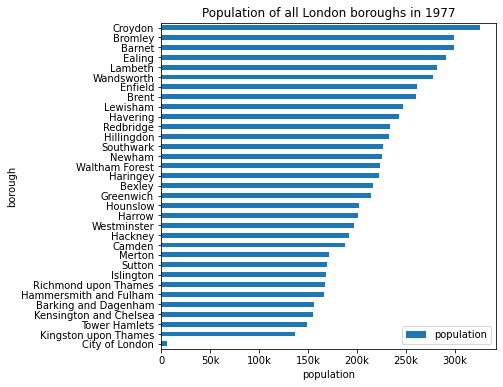

In [16]:
ax = subset.population.sort_values().reset_index(['location', 'year']).plot.barh(figsize=(6, 6))
ax.set_xlabel('population')
ax.set_ylabel('borough')
ax.set_title('Population of all London boroughs in 1977')
ax.set_xticklabels([0,'50k','100k','150k','200k','250k','300k'])

plt.show()

In [17]:
subset = ts.loc[('1985', 'outer')]
subset

,population
borough,
Barking and Dagenham,157900.0
Barnet,294700.0
Bexley,217300.0
Brent,246300.0
Bromley,296900.0
Croydon,317200.0
Ealing,290500.0
Enfield,262600.0
Greenwich,213200.0


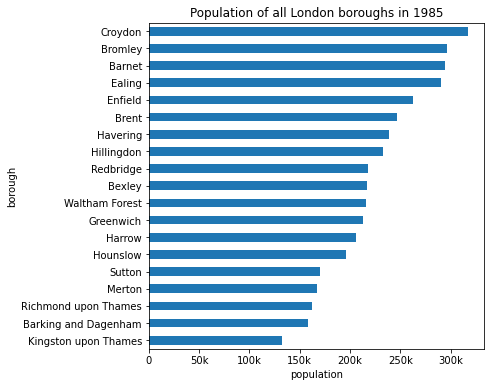

In [18]:
ax = subset.population.sort_values().plot.barh(figsize=(6, 6))
ax.set_xlabel('population')
ax.set_ylabel('borough')
ax.set_title('Population of all London boroughs in 1985')
ax.set_xticklabels([0,'50k','100k','150k','200k','250k','300k'])

plt.show()

In [19]:
subset = ts.xs('Greenwich', level='borough')
subset.head()

,,population
year,location,
1961,outer,231000.0
1962,outer,232000.0
1963,outer,231000.0
1964,outer,231000.0
1965,outer,231000.0


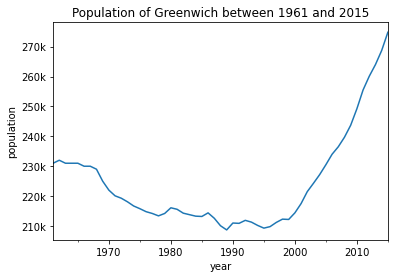

In [20]:
ax = subset.reset_index('location').plot(grid=False, legend=False)
ax.set_title('Population of Greenwich between 1961 and 2015')
ax.set_ylabel('population')
ax.set_xlabel('year')
ax.set_yticklabels([0,'210k', '220k','230k','240k','250k','260k','270k',])

plt.show()

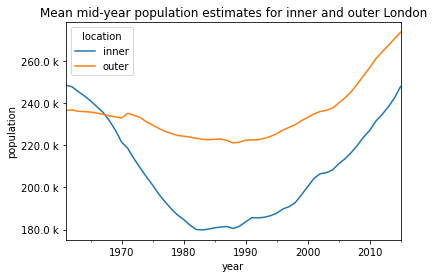

In [21]:
ax = ts.population.groupby(level=['year', 'location']).mean().unstack().plot()
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
ax.set_ylabel('population')
ax.set_title('Mean mid-year population estimates for inner and outer London')

plt.show()

### Population density

In [22]:
sqkm = pd.read_excel('ons-mye-population-totals.xls', sheet_name='MYE', usecols='C:D, BI', skiprows=[0,2], nrows=33)
sqkm

,Area name,Inner or Outer London,LAND AREA (Sq Km)
0,City of London,Inner,2.897980
1,Barking and Dagenham,Outer,36.089810
2,Barnet,Outer,86.737330
3,Bexley,Outer,60.558170
4,Brent,Outer,43.235390
5,Bromley,Outer,150.148580
6,Camden,Inner,21.795970
7,Croydon,Outer,86.519530
8,Ealing,Outer,55.527700
9,Enfield,Outer,80.835879


In [23]:
sqkm.rename(columns={'Area name': 'borough', 'Inner or Outer London': 'location', 'LAND AREA (Sq Km)': 'sqkm'}, inplace=True)
sqkm

,borough,location,sqkm
0,City of London,Inner,2.897980
1,Barking and Dagenham,Outer,36.089810
2,Barnet,Outer,86.737330
3,Bexley,Outer,60.558170
4,Brent,Outer,43.235390
5,Bromley,Outer,150.148580
6,Camden,Inner,21.795970
7,Croydon,Outer,86.519530
8,Ealing,Outer,55.527700
9,Enfield,Outer,80.835879


In [24]:
sqkm['borough'] = sqkm['borough'].astype('category')
sqkm['location'] = sqkm['location'].str.lower().astype('category')
sqkm.set_index(['location', 'borough'], inplace=True)
sqkm.sort_index(inplace=True)
sqkm = sqkm['sqkm']
sqkm

location  borough               
inner     Camden                     21.795970
          City of London              2.897980
          Hackney                    19.064290
          Hammersmith and Fulham     16.404490
          Haringey                   29.586290
          Islington                  14.859840
          Kensington and Chelsea     12.129700
          Lambeth                    26.822120
          Lewisham                   35.154920
          Newham                     36.224220
          Southwark                  28.853320
          Tower Hamlets              19.768290
          Wandsworth                 34.263850
          Westminster                21.479100
outer     Barking and Dagenham       36.089810
          Barnet                     86.737330
          Bexley                     60.558170
          Brent                      43.235390
          Bromley                   150.148580
          Croydon                    86.519530
          Ealing           

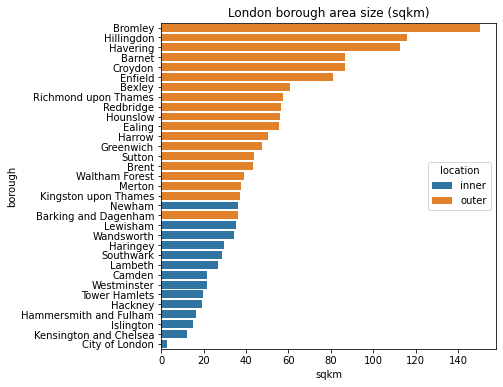

In [25]:
# Create a new table with a single 'borough' index, moving location to
# a column.
table = sqkm.reset_index(level='location', drop=False)
table = table.sort_values(by='sqkm', ascending=False)

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=table.sqkm,
                 y=table.index,
                 hue=table.location,
                 dodge=False,   # Don’t assume this is a grouped bar chart!
                 order=table.index,
                 orient='h')

ax.set_title('London borough area size (sqkm)')
plt.show()

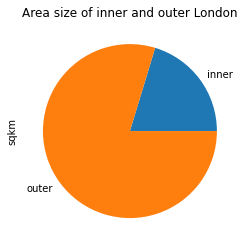

In [26]:
ax = sqkm.groupby('location').sum().plot.pie()
ax.set_title('Area size of inner and outer London')
plt.show()

In [27]:
# Aggregate population by year and location
in_out = ts.groupby(level=['year', 'location']).sum()

# Aggregate borough land areas by location
totals = sqkm.groupby(level='location').sum()

# Density is equal to aggregate population divided by aggregate land areas
in_out['density'] = in_out['population'] / totals

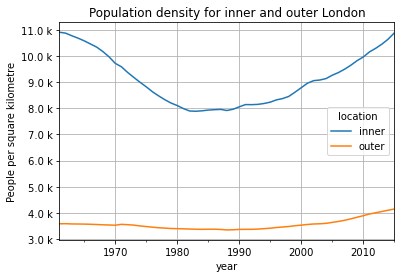

In [28]:
# Graph
ax = in_out['density'].unstack().plot(grid=True) 
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.set_title('Population density for inner and outer London') 
ax.set_ylabel('People per square kilometre')

plt.show()

## Question 1
What is the population change between which two boroughs does the graph depict??

In [29]:
subset = ts.loc[
    (
        slice(None), # all years
        slice(None), # all locations
        ['Ealing', 'Barnet'], 
    ),:]

subset

population
year location borough            
1961 outer    Barnet     318000.0
              Ealing     301000.0
1962 outer    Barnet     318000.0
              Ealing     302000.0
1963 outer    Barnet     316000.0
...                           ...
2013 outer    Ealing     342500.0
2014 outer    Barnet     374900.0
              Ealing     342100.0
2015 outer    Barnet     379691.0
              Ealing     343059.0

[110 rows x 1 columns]

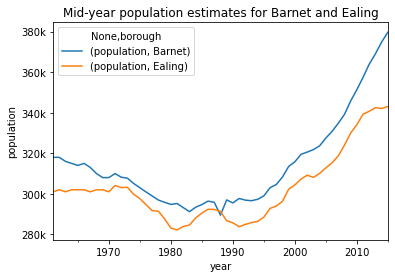

In [30]:
ax = subset.population.reset_index('location').unstack().plot(grid=False, legend=True)
ax.set_title('Mid-year population estimates for Barnet and Ealing')
ax.set_ylabel('population')
ax.set_xlabel('year')
ax.set_yticklabels([0,'280k', '300k','320k','340k','360k', '380k'])

plt.show()

## Question 2
Find: What is the population change between which two boroughs does the graph depict?

In [31]:
subset = ts.loc[
    (
        slice(None), # all years
        slice(None), # all locations
        ['Barking and Dagenham', 'Barnet'], 
    ),:]

subset

population
year location borough                         
1961 outer    Barking and Dagenham    176000.0
              Barnet                  318000.0
1962 outer    Barking and Dagenham    176000.0
              Barnet                  318000.0
1963 outer    Barking and Dagenham    174000.0
...                                        ...
2013 outer    Barnet                  369100.0
2014 outer    Barking and Dagenham    198300.0
              Barnet                  374900.0
2015 outer    Barking and Dagenham    201979.0
              Barnet                  379691.0

[110 rows x 1 columns]

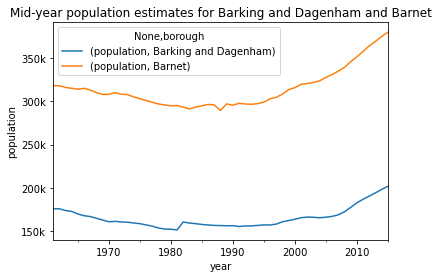

In [32]:
ax = subset.population.reset_index('location').unstack().plot(grid=False, legend=True)
ax.set_title('Mid-year population estimates for Barking and Dagenham and Barnet')
ax.set_ylabel('population')
ax.set_xlabel('year')
ax.set_yticklabels([0,'150k', '200k','250k','300k','350k'])

plt.show()

## Question 3
Find: What is the population change between which two boroughs does this graph depict?

In [33]:
subset = ts.loc[
    (
        slice(None), # all years
        slice(None), # all locations
        ['Kingston upon Thames', 'Havering'], 
    ),:]

subset

population
year location borough                         
1961 outer    Havering                245000.0
              Kingston upon Thames    146000.0
1962 outer    Havering                245000.0
              Kingston upon Thames    146000.0
1963 outer    Havering                246000.0
...                                        ...
2013 outer    Kingston upon Thames    166800.0
2014 outer    Havering                246000.0
              Kingston upon Thames    170000.0
2015 outer    Havering                249085.0
              Kingston upon Thames    173525.0

[110 rows x 1 columns]

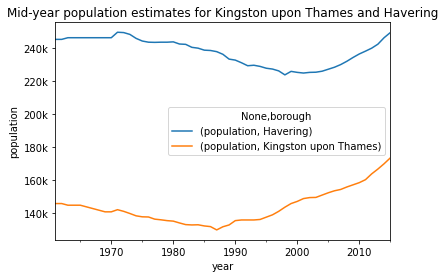

In [34]:
ax = subset.population.reset_index('location').unstack().plot(grid=False, legend=True)
ax.set_title('Mid-year population estimates for Kingston upon Thames and Havering')
ax.set_ylabel('population')
ax.set_xlabel('year')
ax.set_yticklabels([0,'140k', '160k','180k','200k','220k', '240k'])

plt.show()

## Question 4
Find: Which outer London borough was the most densely populated in 2010?

In [35]:
subset_1980 = ts.loc[('1980', 'inner', slice(None),),:].reset_index(['location', 'year'], drop=False)
subset_1980

,year,location,population
borough,,,
Camden,1980,inner,182400.0
City of London,1980,inner,5700.0
Hackney,1980,inner,186000.0
Hammersmith and Fulham,1980,inner,154200.0
Haringey,1980,inner,214700.0
Islington,1980,inner,166800.0
Kensington and Chelsea,1980,inner,143200.0
Lambeth,1980,inner,256600.0
Lewisham,1980,inner,238300.0


In [36]:
# sqkm = sqkm.to_frame()
table = sqkm.loc[('inner', slice(None), slice(None),),:].reset_index('location', drop=False)
table

,location,sqkm
borough,,
Camden,inner,21.795970
City of London,inner,2.897980
Hackney,inner,19.064290
Hammersmith and Fulham,inner,16.404490
Haringey,inner,29.586290
Islington,inner,14.859840
Kensington and Chelsea,inner,12.129700
Lambeth,inner,26.822120
Lewisham,inner,35.154920


In [37]:
subset_1980['density'] = subset_1980['population'] / table['sqkm']
subset_1980['density']

borough
Camden                     8368.519502
City of London             1966.887280
Hackney                    9756.460902
Hammersmith and Fulham     9399.865525
Haringey                   7256.739524
Islington                 11224.885329
Kensington and Chelsea    11805.733035
Lambeth                    9566.730743
Lewisham                   6778.567552
Newham                     5976.664232
Southwark                  7614.375053
Tower Hamlets              7345.096617
Wandsworth                 7769.121100
Westminster                8934.266333
Name: density, dtype: float64

In [38]:
subset_1980['density'].idxmax()

'Kensington and Chelsea'

## Question 5

Find: In which year was Haringey's population density at its highest?

In [39]:
subset_lewisham = ts.loc[(slice(None), slice(None), 'Lewisham',),:]
subset_lewisham

,,,population
year,location,borough,
1961,inner,Lewisham,290000.0
1962,inner,Lewisham,291000.0
1963,inner,Lewisham,289000.0
1964,inner,Lewisham,288000.0
1965,inner,Lewisham,286000.0
...,...,...,...
2011,inner,Lewisham,276900.0
2012,inner,Lewisham,281600.0
2013,inner,Lewisham,286200.0


In [40]:
table.loc['Lewisham']

location      inner
sqkm        35.1549
Name: Lewisham, dtype: object

In [41]:
lewisham_density = subset_lewisham['population'] / 35.1549
lewisham_density

year  location  borough 
1961  inner     Lewisham    8249.205658
1962  inner     Lewisham    8277.651195
1963  inner     Lewisham    8220.760122
1964  inner     Lewisham    8192.314585
1965  inner     Lewisham    8135.423511
                               ...     
2011  inner     Lewisham    7876.569127
2012  inner     Lewisham    8010.263150
2013  inner     Lewisham    8141.112619
2014  inner     Lewisham    8303.252178
2015  inner     Lewisham    8457.569215
Name: population, Length: 55, dtype: float64

In [42]:
lewisham_density.idxmax()

(Period('2015', 'A-DEC'), 'inner', 'Lewisham')

## Question 6

Find: What does this graph show? (Difference in population over time between which two boroughs?)

In [43]:
difference = (ts.xs('Croydon', level='borough') - 
              ts.xs('Waltham Forest', level='borough'))
difference.name = 'difference'
difference.head()

,,population
year,location,
1961,outer,78000.0
1962,outer,80000.0
1963,outer,82000.0
1964,outer,83000.0
1965,outer,85000.0


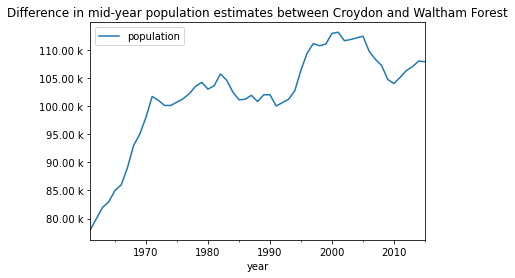

In [44]:
ax = difference.reset_index('location').plot()
ax.set_title('Difference in mid-year population estimates between Croydon and Waltham Forest')
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=2))

## Question 7

Find: What does this graph show? (Difference in population over time between which two boroughs?)

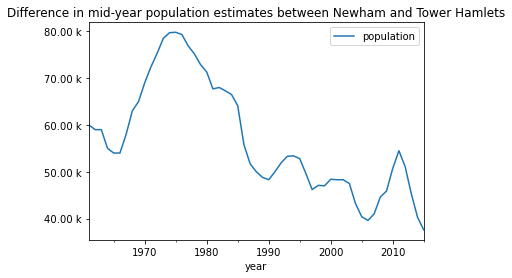

In [45]:
difference = (ts.xs('Newham', level='borough') - 
              ts.xs('Tower Hamlets', level='borough'))
difference.name = 'difference'

ax = difference.reset_index('location').plot()
ax.set_title('Difference in mid-year population estimates between Newham and Tower Hamlets')
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=2))

## Question 8

Find: What does the graph show? (Year-on-year change in population for which borough?)

In [46]:
pop_change = ts.xs('Barnet', level='borough')
pop_change

,,population
year,location,
1961,outer,318000.0
1962,outer,318000.0
1963,outer,316000.0
1964,outer,315000.0
1965,outer,314000.0
...,...,...
2011,outer,357500.0
2012,outer,364000.0
2013,outer,369100.0


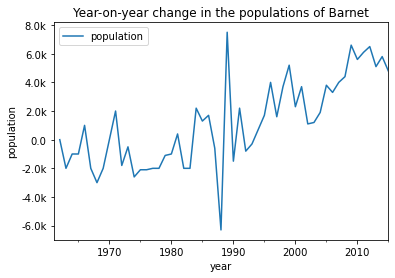

In [47]:
ax = pop_change['population'].diff().reset_index('location').plot()
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.set_title('Year-on-year change in the populations of Barnet')
ax.set_ylabel('population')
ax.set_yticklabels(['-7.0k', '-6.0k', '-4.0k','-2.0k','0.0','2.0k', '4.0k', '6.0k', '8.0k'])
plt.show()

## Question 9

Find: What does this graph show? (Year-on-year change in population for which borough?)

In [48]:
pop_change = ts.xs('Hounslow', level='borough')
pop_change

,,population
year,location,
1961,outer,208000.0
1962,outer,209000.0
1963,outer,208000.0
1964,outer,207000.0
1965,outer,207000.0
...,...,...
2011,outer,254900.0
2012,outer,259100.0
2013,outer,262400.0


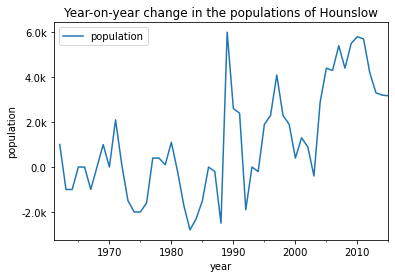

In [49]:
ax = pop_change['population'].diff().reset_index('location').plot()
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.set_title('Year-on-year change in the populations of Hounslow')
ax.set_ylabel('population')
ax.set_yticklabels(['-3.0k','-2.0k','0.0','2.0k', '4.0k', '6.0k'])
plt.show()